# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bulan Mulya Utama
- **Email:** m312b4kx0882@bangkit.academy
- **ID Dicoding:** bulaanmly

## Menentukan Pertanyaan Bisnis

1. Apakah terdapat perbedaan antara total sewa tahun 2011 dan 2012?
2. Apakah ada hubungan antara variabel independen(temperatur, kelembapan, dan kec. angin) terhadap variabel dependen(kolom total)
3. Bagaimana pengaruh kondisi cuaca terhadap tingkat penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
#Library yang akan digunakan untuk analisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
#import dataset
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

In [4]:
#Memeriksa tipe data dari tiap kolom variabel
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#cek null value
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#cek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#cek duplicate data
print('Jumlah duplikasi:', hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [8]:
#Statistika Deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [9]:
#Mengubah beberapa nama variabel akan lebih mudah di pahami dan di interpretasikan
hour_df = hour_df.rename(columns={'dteday': 'datetime',
                                'weathersit': 'weather',
                                'yr': 'year',
                                'mnth': 'month',
                                'hr': 'hour',
                                'cnt': 'total'})

hour_df.head(10)

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [10]:
#Mengganti tipe data datetime
hour_df['datetime'] = pd.to_datetime(hour_df['datetime'])

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  total       17379 non-

## Exploratory Data Analysis (EDA)

### Explore hour_df

1. Explore untuk melihat perbedaan total sewa sepeda 2011 dan 2012.

In [12]:
hour_df.groupby(by=[hour_df["datetime"].dt.year]).agg({ # Changed our_df to hour_df
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

,total,casual,registered
datetime,,,
2011,1243103,247252,995851
2012,2049576,372765,1676811


In [13]:
# Mengambil tahun dari kolom datetime
hour_df['year'] = hour_df['datetime'].dt.year

hour_df.groupby(by=['year', 'month']).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
year month                            
2011 1       38189    3073       35116
     2       48215    6242       41973
     3       64045   12826       51219
     4       94870   22346       72524
     5      135821   31050      104771
     6      143512   30612      112900
     7      141341   36452      104889
     8      136691   28842      107849
     9      127418   26545      100873
     10     123511   25222       98289
     11     102167   15594       86573
     12      87323    8448       78875
2012 1       96744    8969       87775
     2      103137    8721       94416
     3      164875   31618      133257
     4      174224   38456      135768
     5      195865   44235      151630
     6      202830   43294      159536
     7      203607   41705      161902
     8      214503   43197      171306
     9      218573   43778      174795
     10     198841   34538      164303
     11     152664   21009      131655
     12     123713   13245      110468

2. Explore untuk melihat pengaruh cuaca terhadap jumlah penyewaan sepeda.

In [14]:
hour_df.groupby(by="weather").agg({
    "total": ["sum", "mean"]
})

total            
             sum        mean
weather                     
1        2338173  204.869272
2         795952  175.165493
3         158331  111.579281
4            223   74.333333

In [15]:
#total sewa sepeda berdasarkan cuaca dan tahun
hour_df.groupby(by=[hour_df["datetime"].dt.year,hour_df["weather"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime weather                             
2011     1         875053  183733      691320
         2         300519   53809      246710
         3          67495    9709       57786
         4             36       1          35
2012     1        1463120  279012     1184108
         2         495433   80672      414761
         3          90836   13074       77762
         4            187       7         180

In [16]:
#total sewa sepeda berdasarkan cuaca dan bulan
hour_df.groupby(by=[hour_df["datetime"].dt.month,hour_df["weather"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime weather                            
1        1         92726    8843       83883
         2         36634    2844       33790
         3          5350     347        5003
         4           223       8         215
2        1        105618   11196       94422
         2         35414    3198       32216
         3         10320     569        9751
3        1        156094   30077      126017
         2         62902   12978       49924
         3          9924    1389        8535
4        1        201563   47314      154249
         2         55301   11997       43304
         3         12230    1491       10739
5        1        233001   54799      178202
         2         78914   17029       61885
         3         19771    3457       16314
6        1        274190   60005      214185
         2         61457   12213       49244
         3         10695    1688        9007
7        1        275693   63869      211824
         2         57146   11669       45477
         3         12109    2619        9490
8        1        258351   54514      203837
         2         75262   13508       61754
         3         17581    4017       13564
9        1        239042   48183      190859
         2         87113   18819       68294
         3         19836    3321       16515
10       1        204467   42720      161747
         2         95330   14392       80938
         3         22555    2648       19907
11       1        176571   28455      148116
         2         68828    7609       61219
         3          9432     539        8893
12       1        120857   12770      108087
         2         81651    8225       73426
         3          8528     698        7830

3. Explore untuk melihat pengaruh musim terhadap jumlah penyewaan sepeda.

In [17]:
#group by season
hour_df.groupby(by="season").agg({
    "total": ["sum", "mean"]
})

total            
            sum        mean
season                     
1        471348  111.114569
2        918589  208.344069
3       1061129  236.016237
4        841613  198.868856

In [18]:
#total sewa sepeda berdasarkan musim dan tahun
hour_df.groupby(by=[hour_df["datetime"].dt.year,hour_df["season"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime season                            
2011     1       150000   21425      128575
         2       347316   77564      269752
         3       419650   95450      324200
         4       326137   52813      273324
2012     1       321348   39197      282151
         2       571273  125958      445315
         3       641479  130641      510838
         4       515476   76969      438507

In [19]:
#total sewa sepeda berdasarkan musim dan bulan
hour_df.groupby(by=[hour_df["datetime"].dt.month,hour_df["season"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime season                            
1        1       134933   12042      122891
2        1       151352   14963      136389
3        1       142065   27154      114911
         2        86855   17290       69565
4        2       269094   60802      208292
5        2       331686   75285      256401
6        2       230954   50145      180809
         3       115388   23761       91627
7        3       344948   78157      266791
8        3       351194   72039      279155
9        3       249599   52134      197465
         4        96392   18189       78203
10       4       322352   59760      262592
11       4       254831   36603      218228
12       1        42998    6463       36535
         4       168038   15230      152808

In [20]:
#total sewa berdasarkan hari
hour_df.groupby(by=hour_df["weekday"]).agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
weekday,,,
5,78238,409552,487790
4,61460,423935,485395
6,153852,323955,477807
3,57319,415729,473048
2,57843,411266,469109
1,70784,384719,455503
0,140521,303506,444027


In [21]:
#total sewa  berdasarkan hari libur
hour_df.groupby(by=hour_df["workingday"]).agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


## Visualization & Explanatory Analysis

In [22]:
# setting ukuran canvas plot

sns.set_style('whitegrid')
sns.set_context('talk')
parameter = {'legend.fontsize': 'x-large',
          'figure.figsize': (35, 15),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(parameter)

### Pertanyaan 1:

Apakah terdapat perbedaan antara total sewa tahun 2011 dan 2012?

/var/folders/dy/x81vxxgj46l7l9n21fbz30xc0000gn/T/ipykernel_10072/451822401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df.groupby(by=hour_df["datetime"].dt.year.astype(str)).agg({


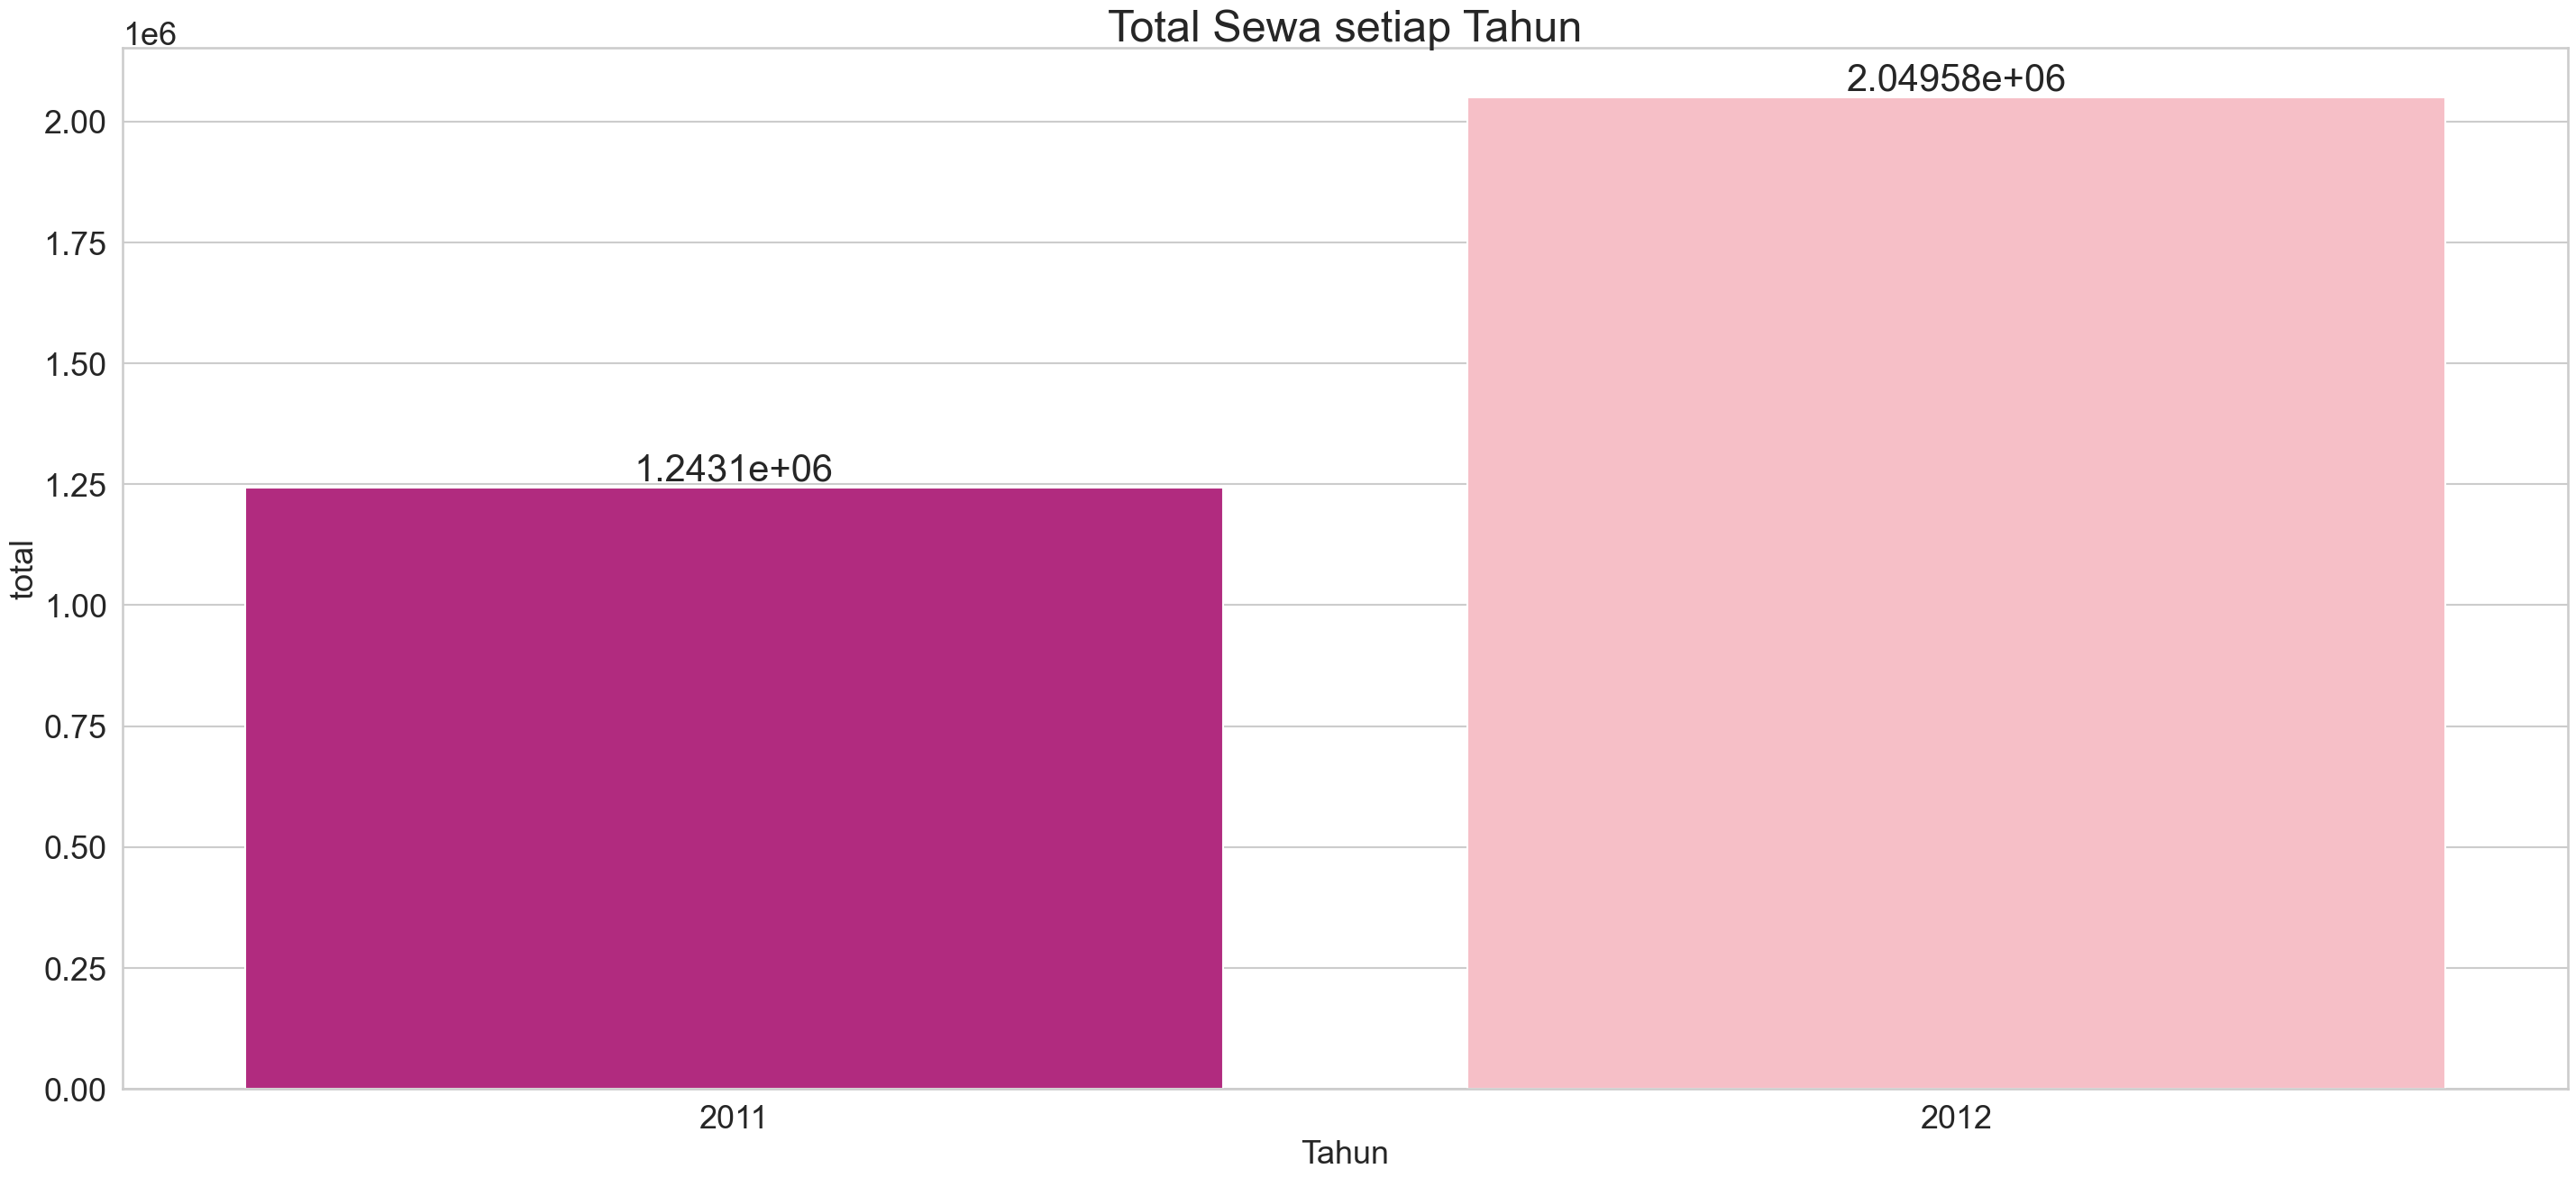

In [23]:
#membuat bar chart
fig, ax = plt.subplots()
date_colors = {"2011": "#C71585", "2012": "#FFB6C1"}
sns.barplot(data=hour_df.groupby(by=hour_df["datetime"].dt.year.astype(str)).agg({
            'total': 'sum'
            }).reset_index(),
            x='datetime',
            y='total',
            palette=date_colors,
            ax=ax
            )

ax.set_title('Total Sewa setiap Tahun', fontsize=35)
ax.set_xlabel('Tahun')

# Menambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fontsize=30)

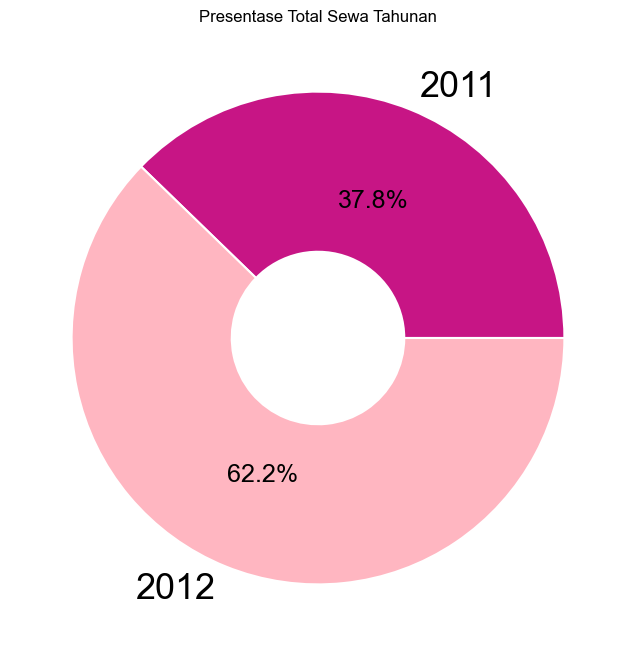

In [24]:
#membuat pie chart
plt.figure(figsize=(15, 8))
plt.pie(
    data=hour_df.groupby(by=hour_df["datetime"].dt.year).agg({
    'total': 'sum'
    }).reset_index(),
    x='total',
    labels='datetime',
    colors = ("#C71585", "#FFB6C1"),
    wedgeprops={'width': 0.65},
    textprops={'color':"black"},
    autopct='%1.1f%%'
)

plt.title("Presentase Total Sewa Tahunan", loc="center", fontsize=12, color='black')
plt.show()

### Pertanyaan 2:

Apakah ada hubungan antara variabel independen(temperatur, kelembapan, dan kec. angin) terhadap variabel dependen(kolom total) ?

Untuk menjawab pertanyaan ini perlu dilakukan uji analisis lanjutan uji parametrik/ non-paramterik untuk mengetahui hubungan antar variabel di atas

Pemilihan antara uji parametrik dan non parametrik tergantung pada asumsi data. Oleh karena itu perlu dilakukan uji asumsi untuk melihat data termasuk dalam paramterik/non-parametrik

***Uji Distribusi Normal***

H0 : data berdistribusi normal

H1 : data tidak berdistribusi normal

H0 ditolak jika nilai p-value < 0.05

p value is 0.0, so data is Not Normal Distribution


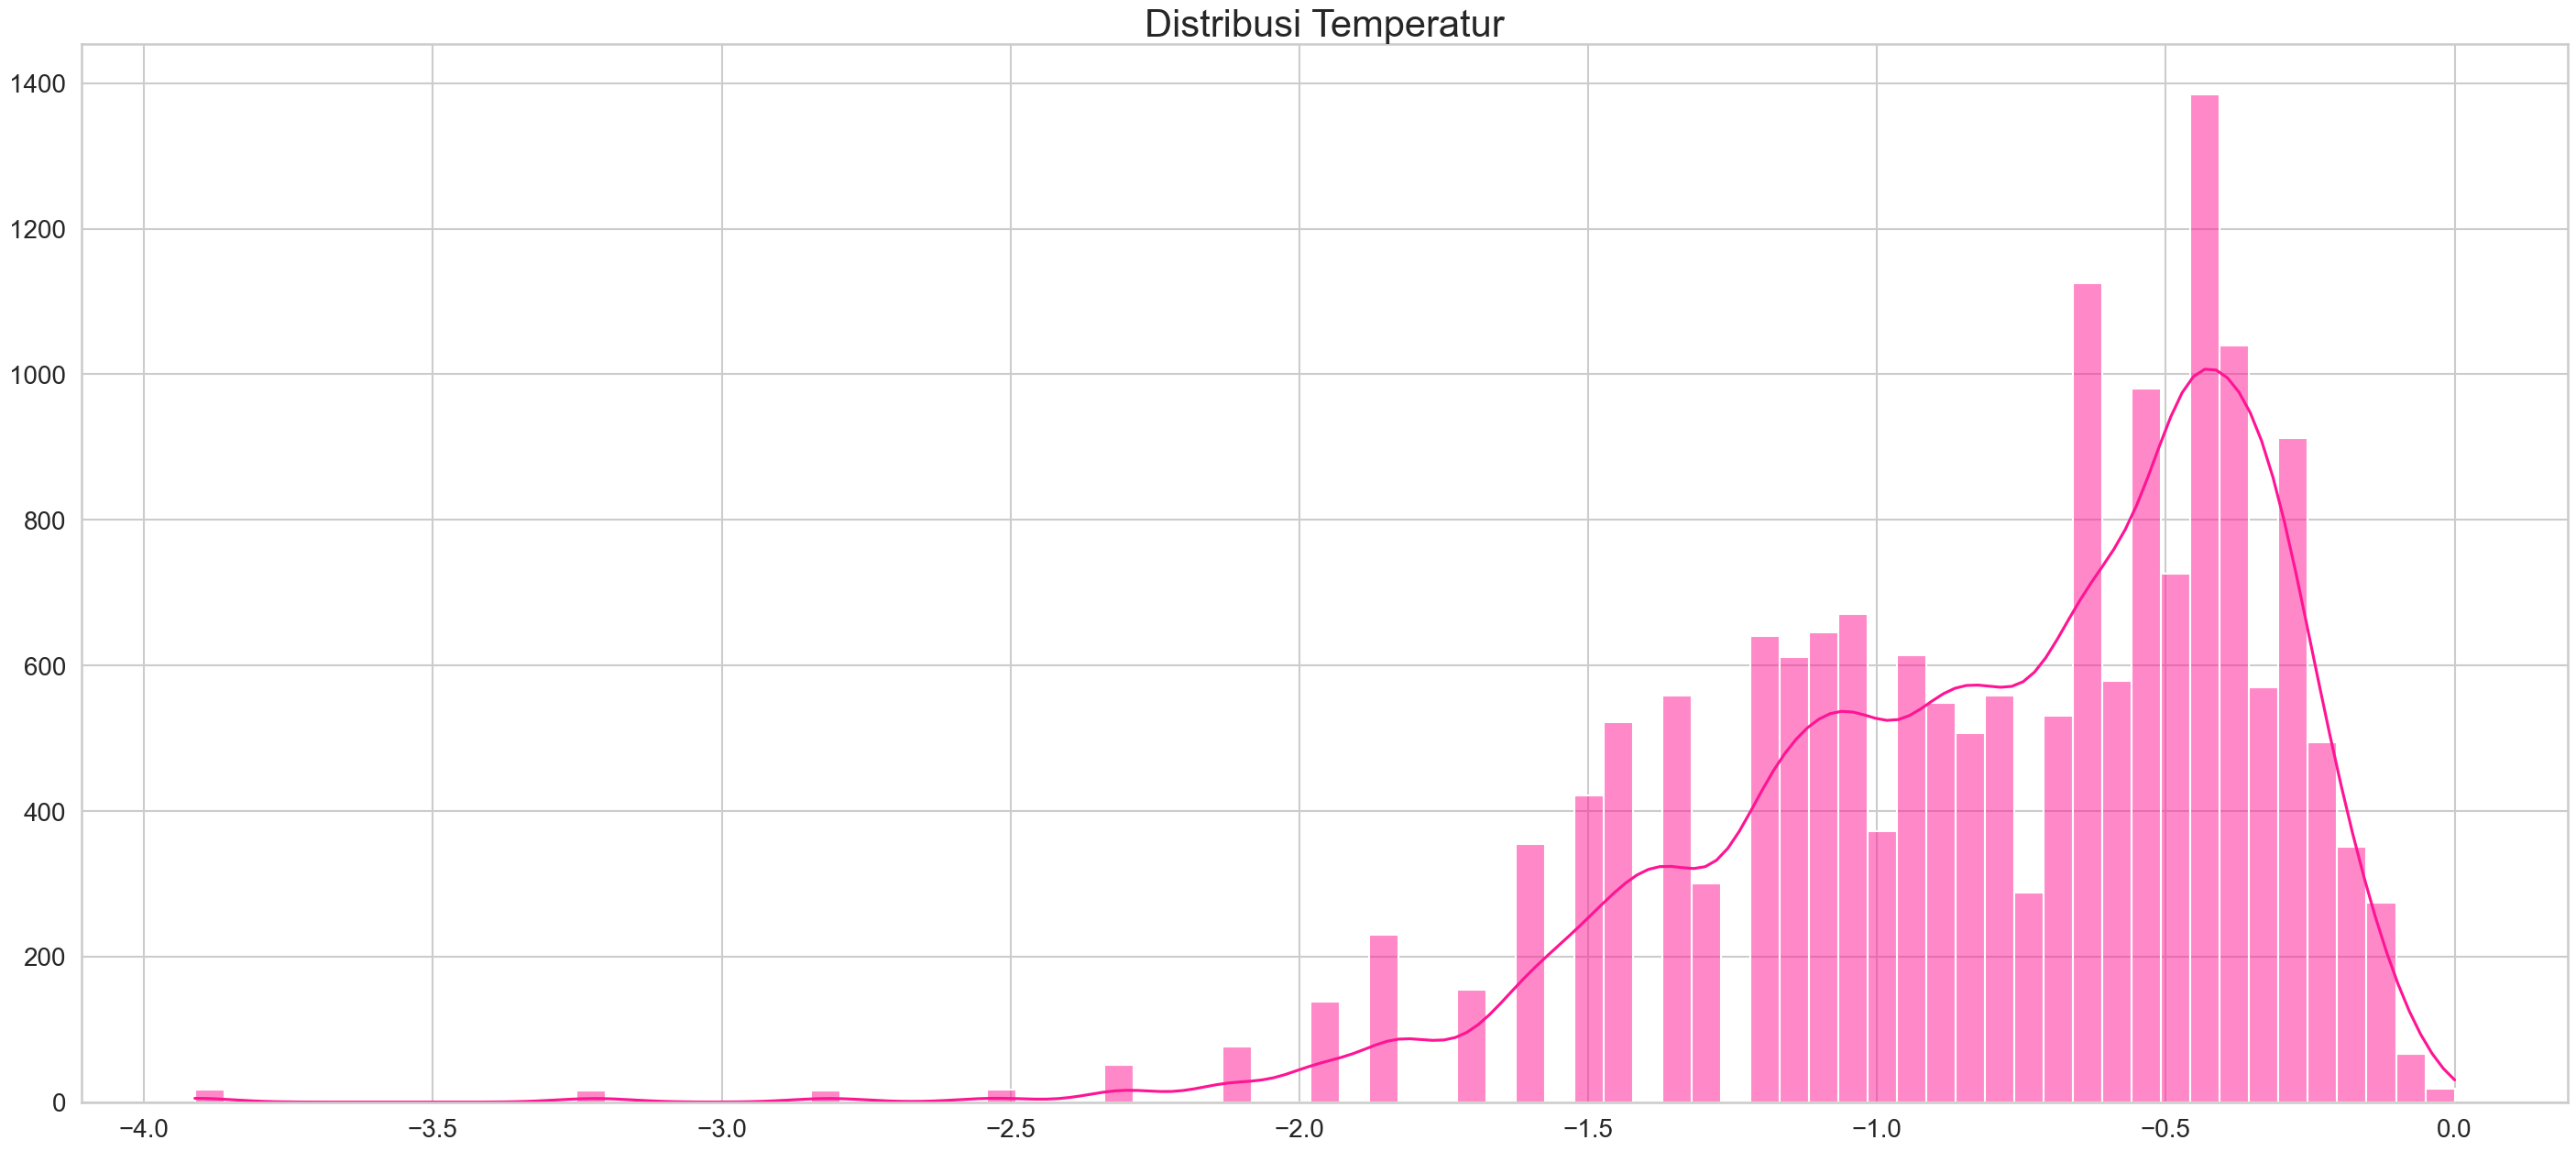

In [25]:
#Uji distribusi var. temp
stat, p = stats.jarque_bera(hour_df['temp'])

p_value = 'Normal Distributon' if p >= 0.5 else 'Not Normal Distribution'
print(f'p value is {round(p, 4)}, so data is {p_value}')

fig, ax = plt.subplots()

# melihat distribusi var. temp
sns.histplot(data=np.log(hour_df['temp']),
            kde=True,
            ax=ax,
            color='#FF1493')

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribusi Temperatur", loc="center", fontsize=30)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis ='x', labelsize=20)

plt.show()

p value is 0.0, so data is Not Normal Distribution


/Users/budiyanto/Downloads/Proyek Analisis Data Fix/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


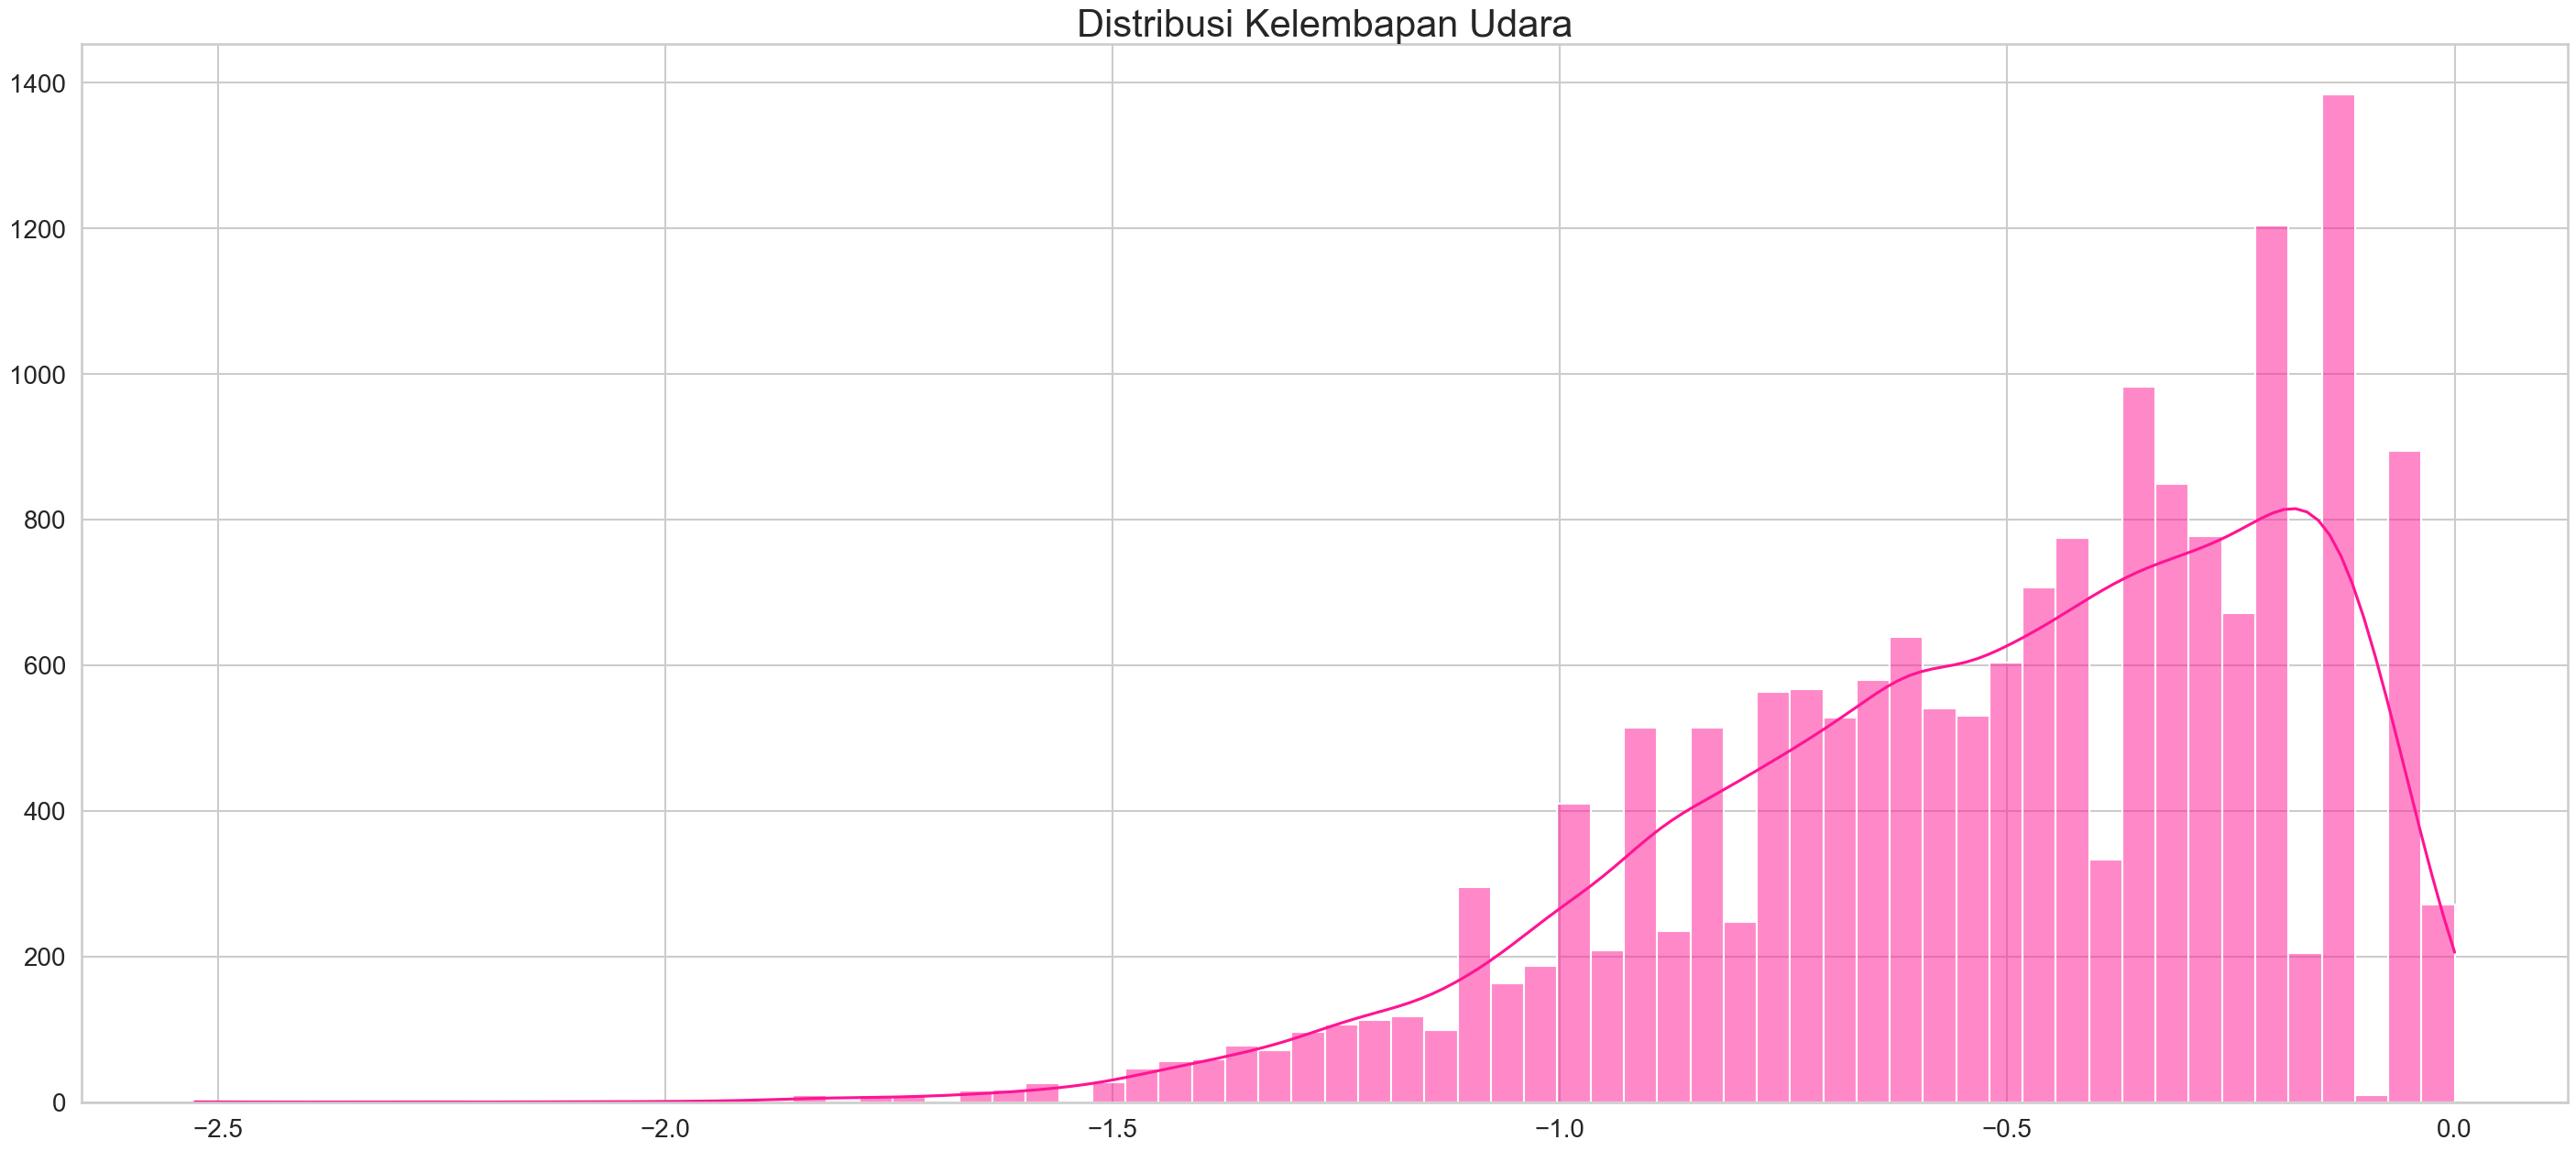

In [26]:
# Import library yang dibutuhkan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Uji distribusi var. hum
stat, p = stats.jarque_bera(hour_df['hum'])

p_value = 'Normal Distribution' if p >= 0.5 else 'Not Normal Distribution'
print(f'p value is {round(p, 4)}, so data is {p_value}')

# Buat plot
fig, ax = plt.subplots()

# Melihat distribusi variabel hum dengan warna yang diubah (misal warna biru muda)
sns.histplot(data=np.log(hour_df['hum']),
             kde=True,
             ax=ax,
             color='#FF1493')  # Ubah warna di sini, contoh: '#72BCD4' untuk biru muda

# Modifikasi label dan tampilan
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribusi Kelembapan Udara", loc="center", fontsize=30)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Tampilkan plot
plt.show()


p value is 0.0, so data is Not Normal Distribution


/Users/budiyanto/Downloads/Proyek Analisis Data Fix/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


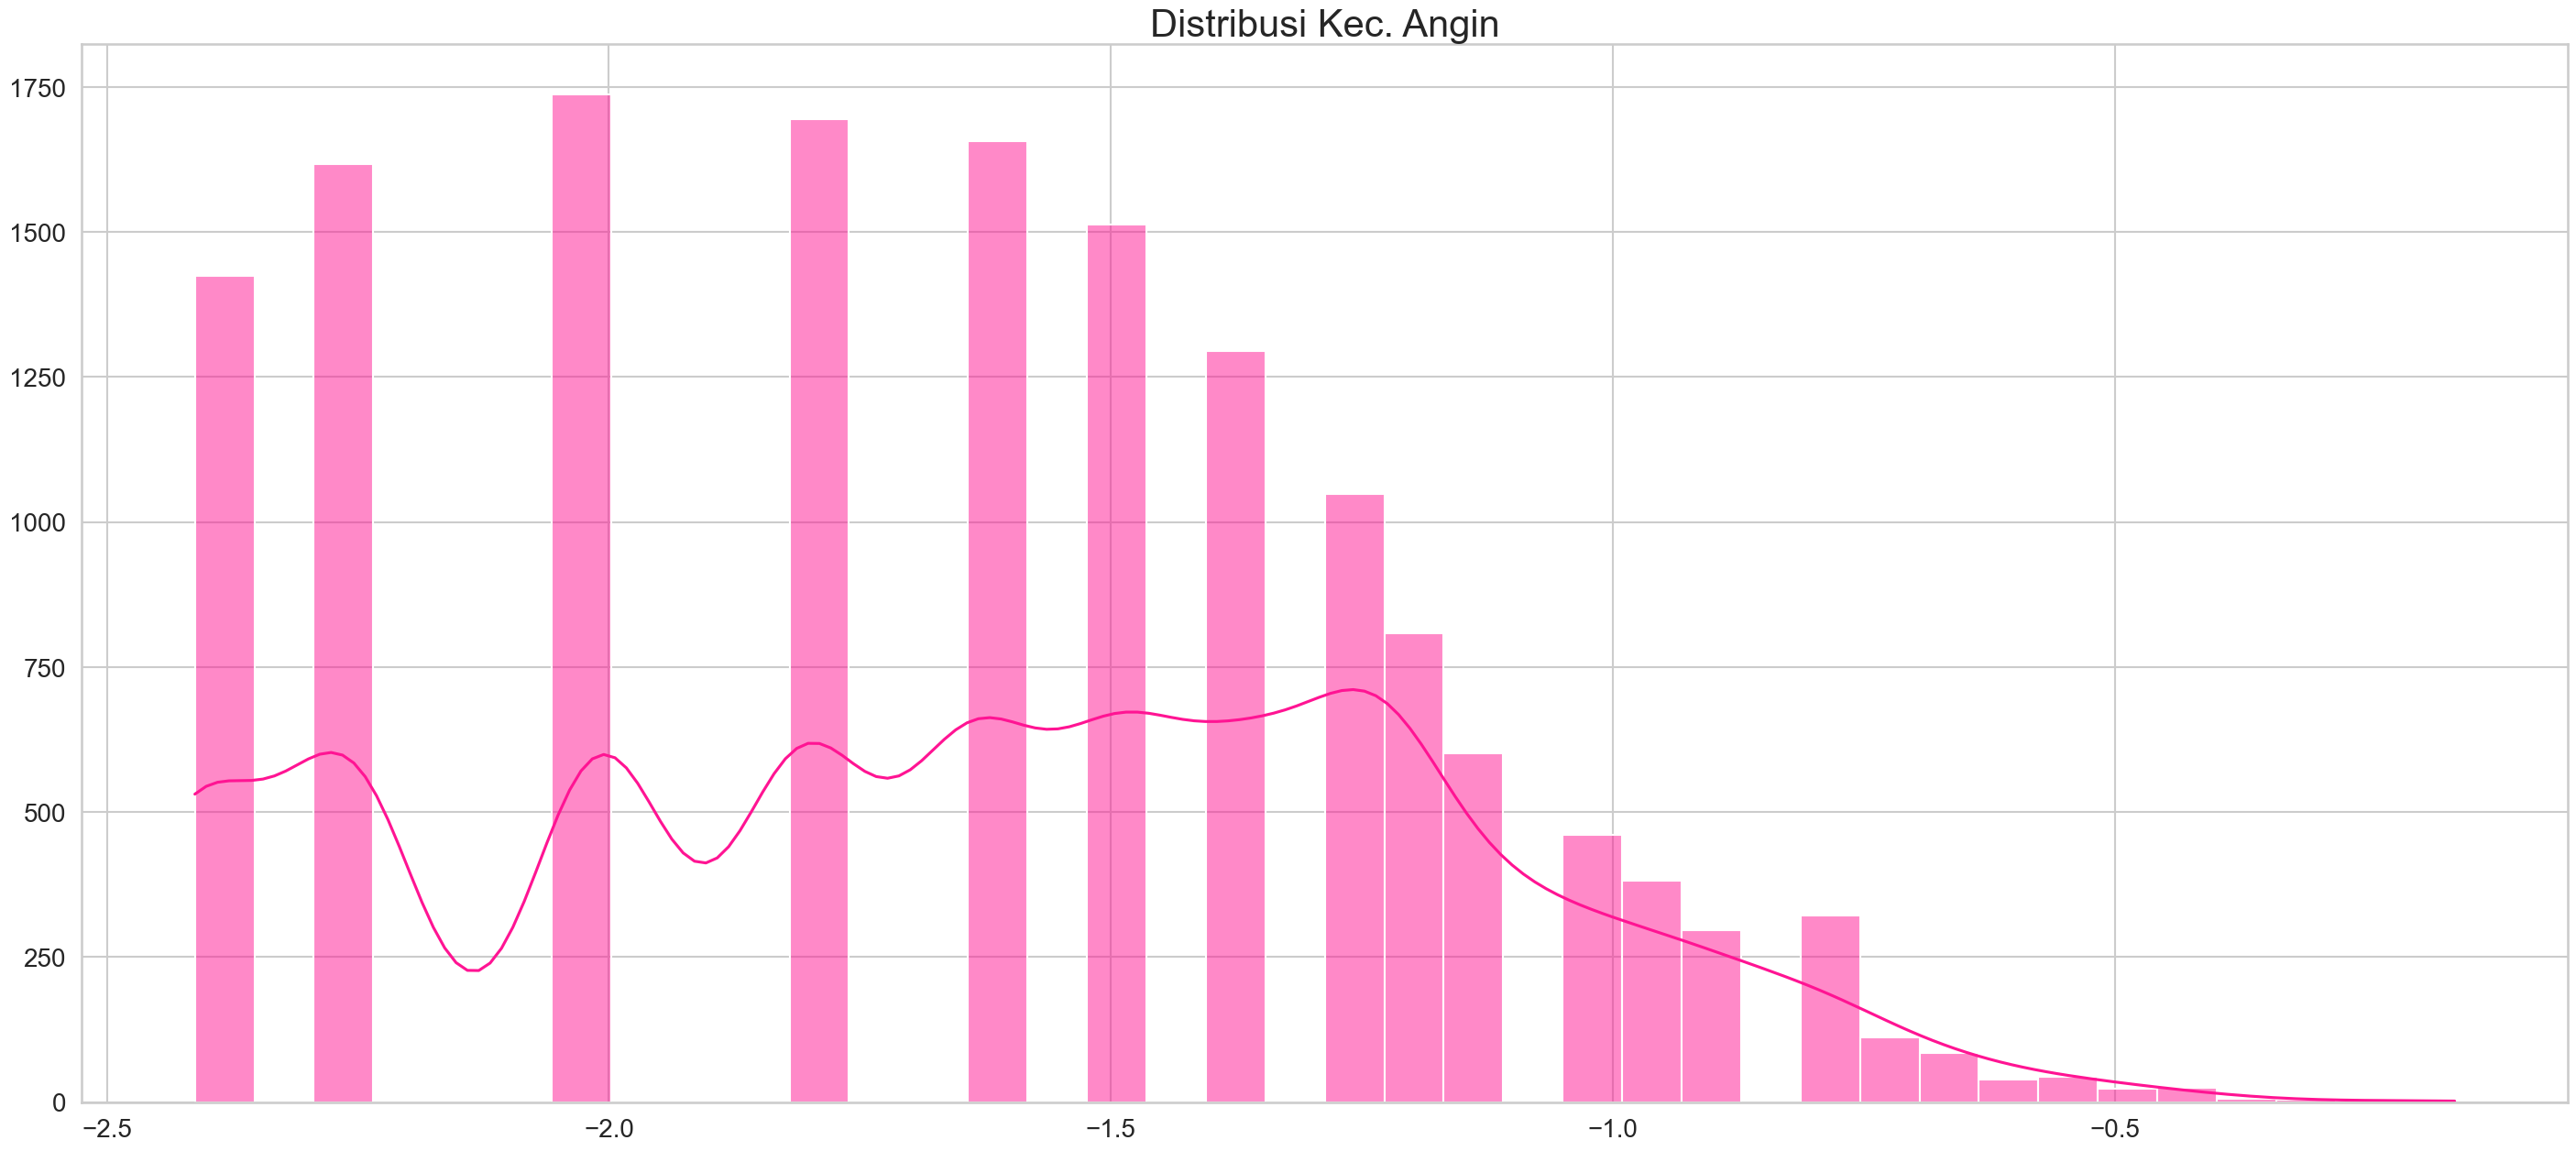

In [27]:
# Import library yang dibutuhkan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Uji distribusi var. windspeed
stat, p = stats.jarque_bera(hour_df['windspeed'])

p_value = 'Normal Distribution' if p >= 0.5 else 'Not Normal Distribution'
print(f'p value is {round(p, 4)}, so data is {p_value}')

# Buat plot
fig, ax = plt.subplots()

# Melihat distribusi variabel windspeed dengan warna yang diubah (misal warna hijau)
sns.histplot(data=np.log(hour_df['windspeed']),
             kde=True,
             ax=ax,
             color='#FF1493')  # Ubah warna di sini, contoh: '#32CD32' untuk lime green

# Modifikasi label dan tampilan
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribusi Kec. Angin", loc="center", fontsize=30)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Tampilkan plot
plt.show()


p value is 0.0, so data is Not Normal Distribution


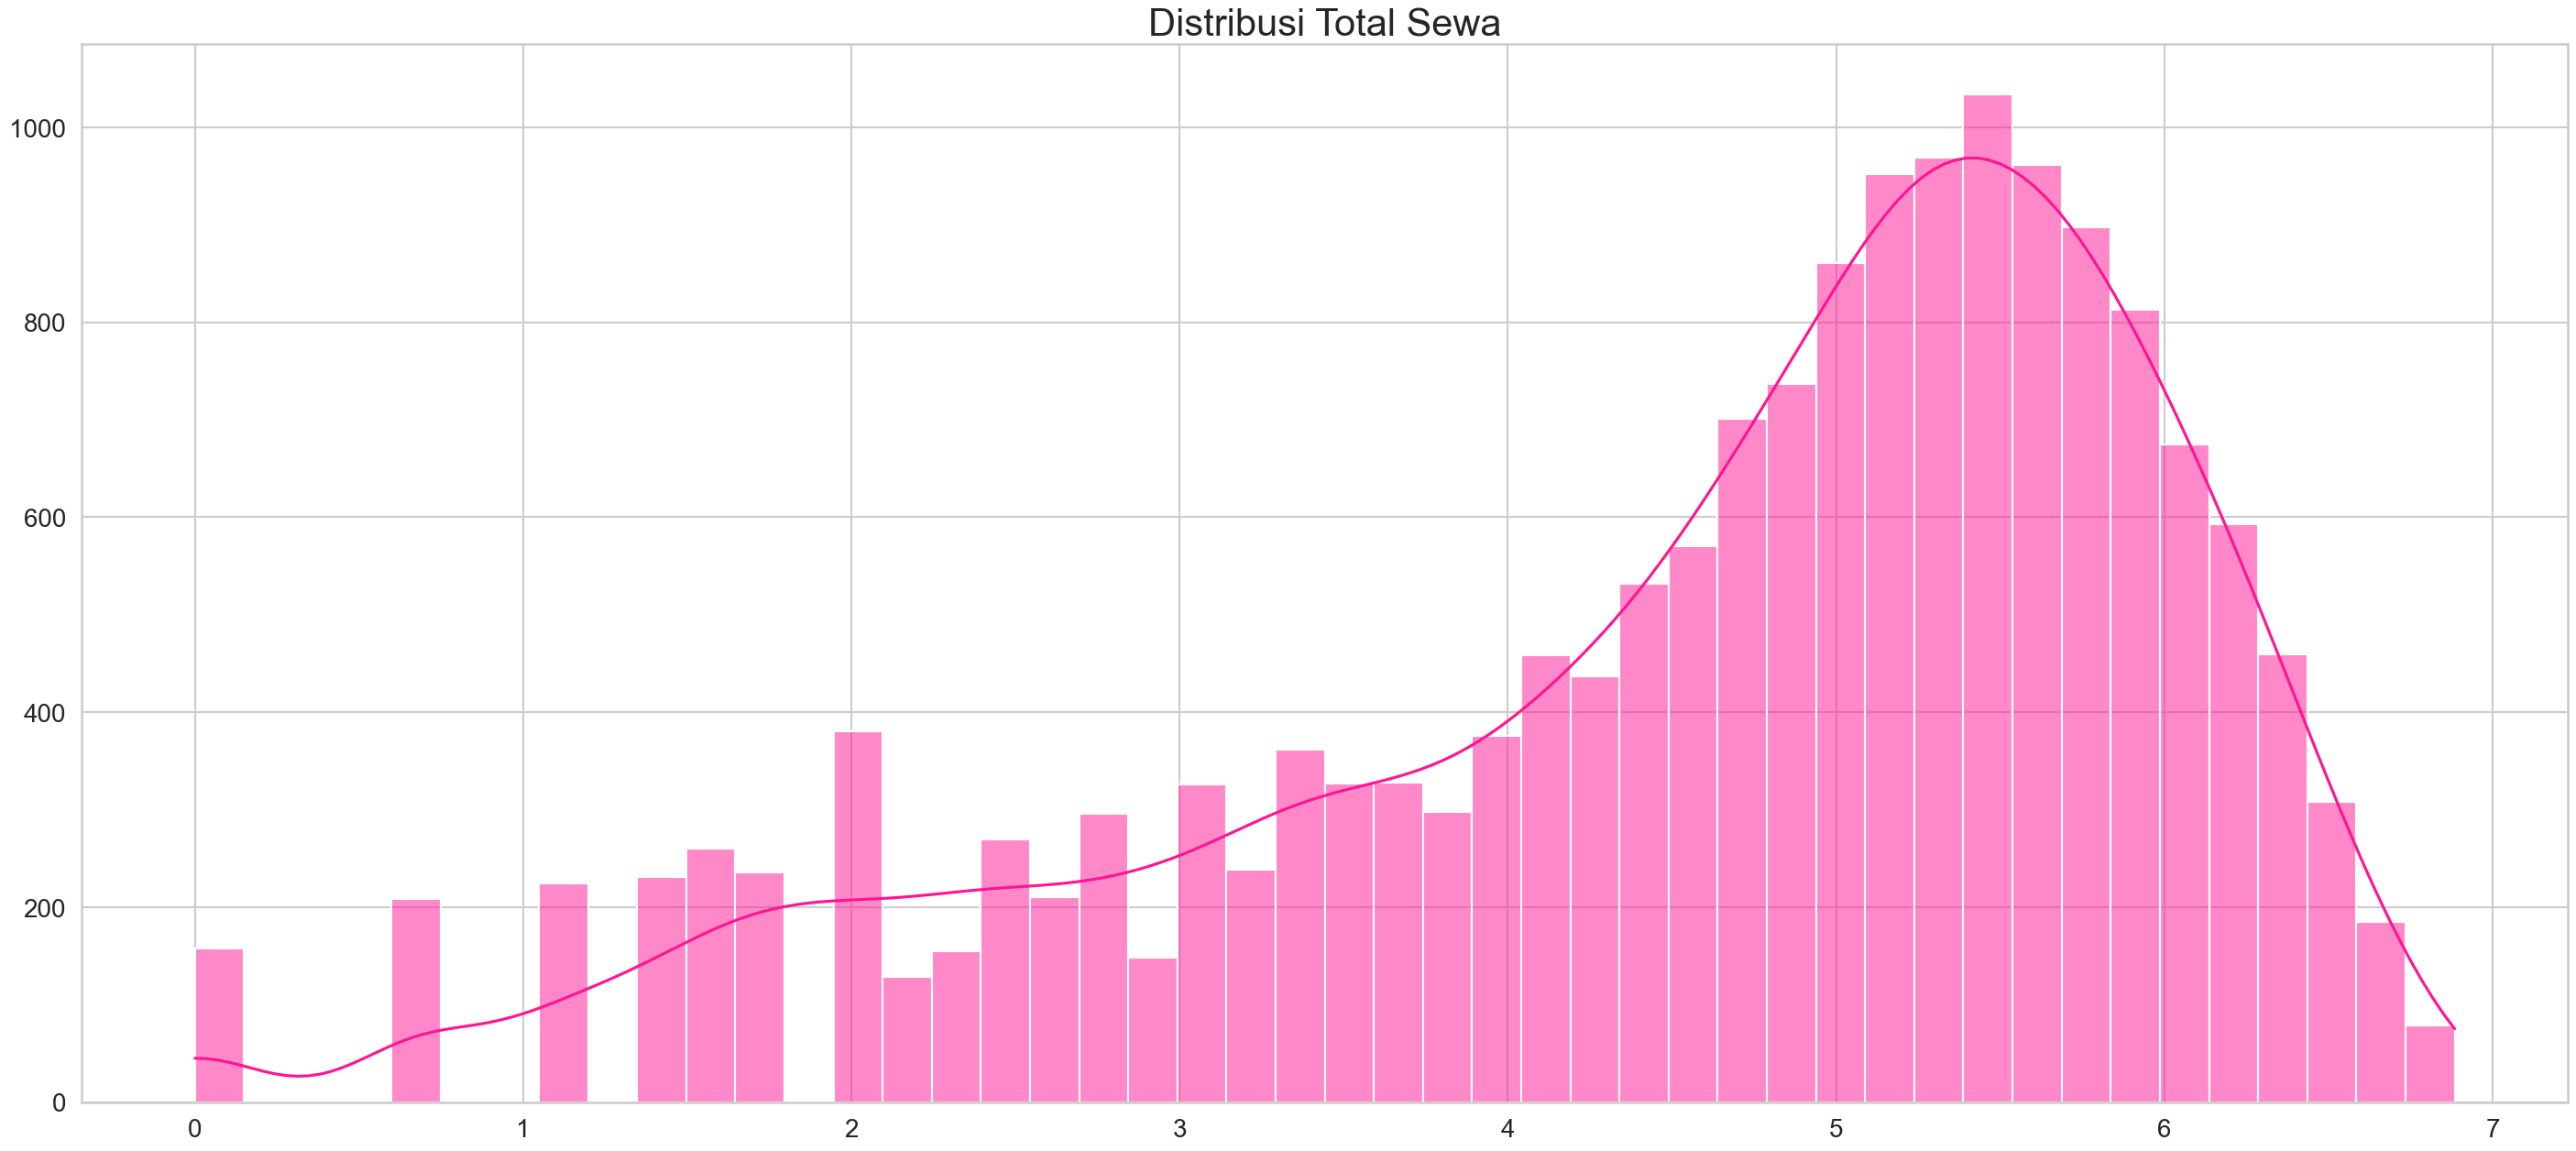

In [28]:
# Import library yang dibutuhkan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Uji distribusi var. total
stat, p = stats.jarque_bera(hour_df['total'])

p_value = 'Normal Distribution' if p >= 0.5 else 'Not Normal Distribution'
print(f'p value is {round(p, 4)}, so data is {p_value}')

# Buat plot
fig, ax = plt.subplots()

# Melihat distribusi variabel total dengan warna yang diubah (misal warna oranye)
sns.histplot(data=np.log(hour_df['total']),
             kde=True,
             ax=ax,
             color='#FF1493')  # Ubah warna di sini, contoh: '#FFA500' untuk oranye

# Modifikasi label dan tampilan
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribusi Total Sewa", loc="center", fontsize=30)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Tampilkan plot
plt.show()


***Uji Korelasi***


H0 :  𝜌  = 0 (variabel independen, tidak terdapat korelasi)

H1 :  𝜌  ≠ 0

H0 ditolak apabila p-value < 0.05

In [29]:
#Uji masing masing var. independen dengan var. dependen
stat, p = stats.spearmanr(hour_df.temp, hour_df.total)
print(stat, round(p, 4))

stat, p = stats.spearmanr(hour_df.hum, hour_df.total)
print(stat, round(p, 4))

stat, p = stats.spearmanr(hour_df.windspeed, hour_df.total)
print(stat, round(p, 4))

0.4233295244770643 0.0
-0.359614188399031 0.0
0.12662883138376593 0.0


               temp       hum  windspeed     total
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
total      0.404772 -0.322911   0.093234  1.000000


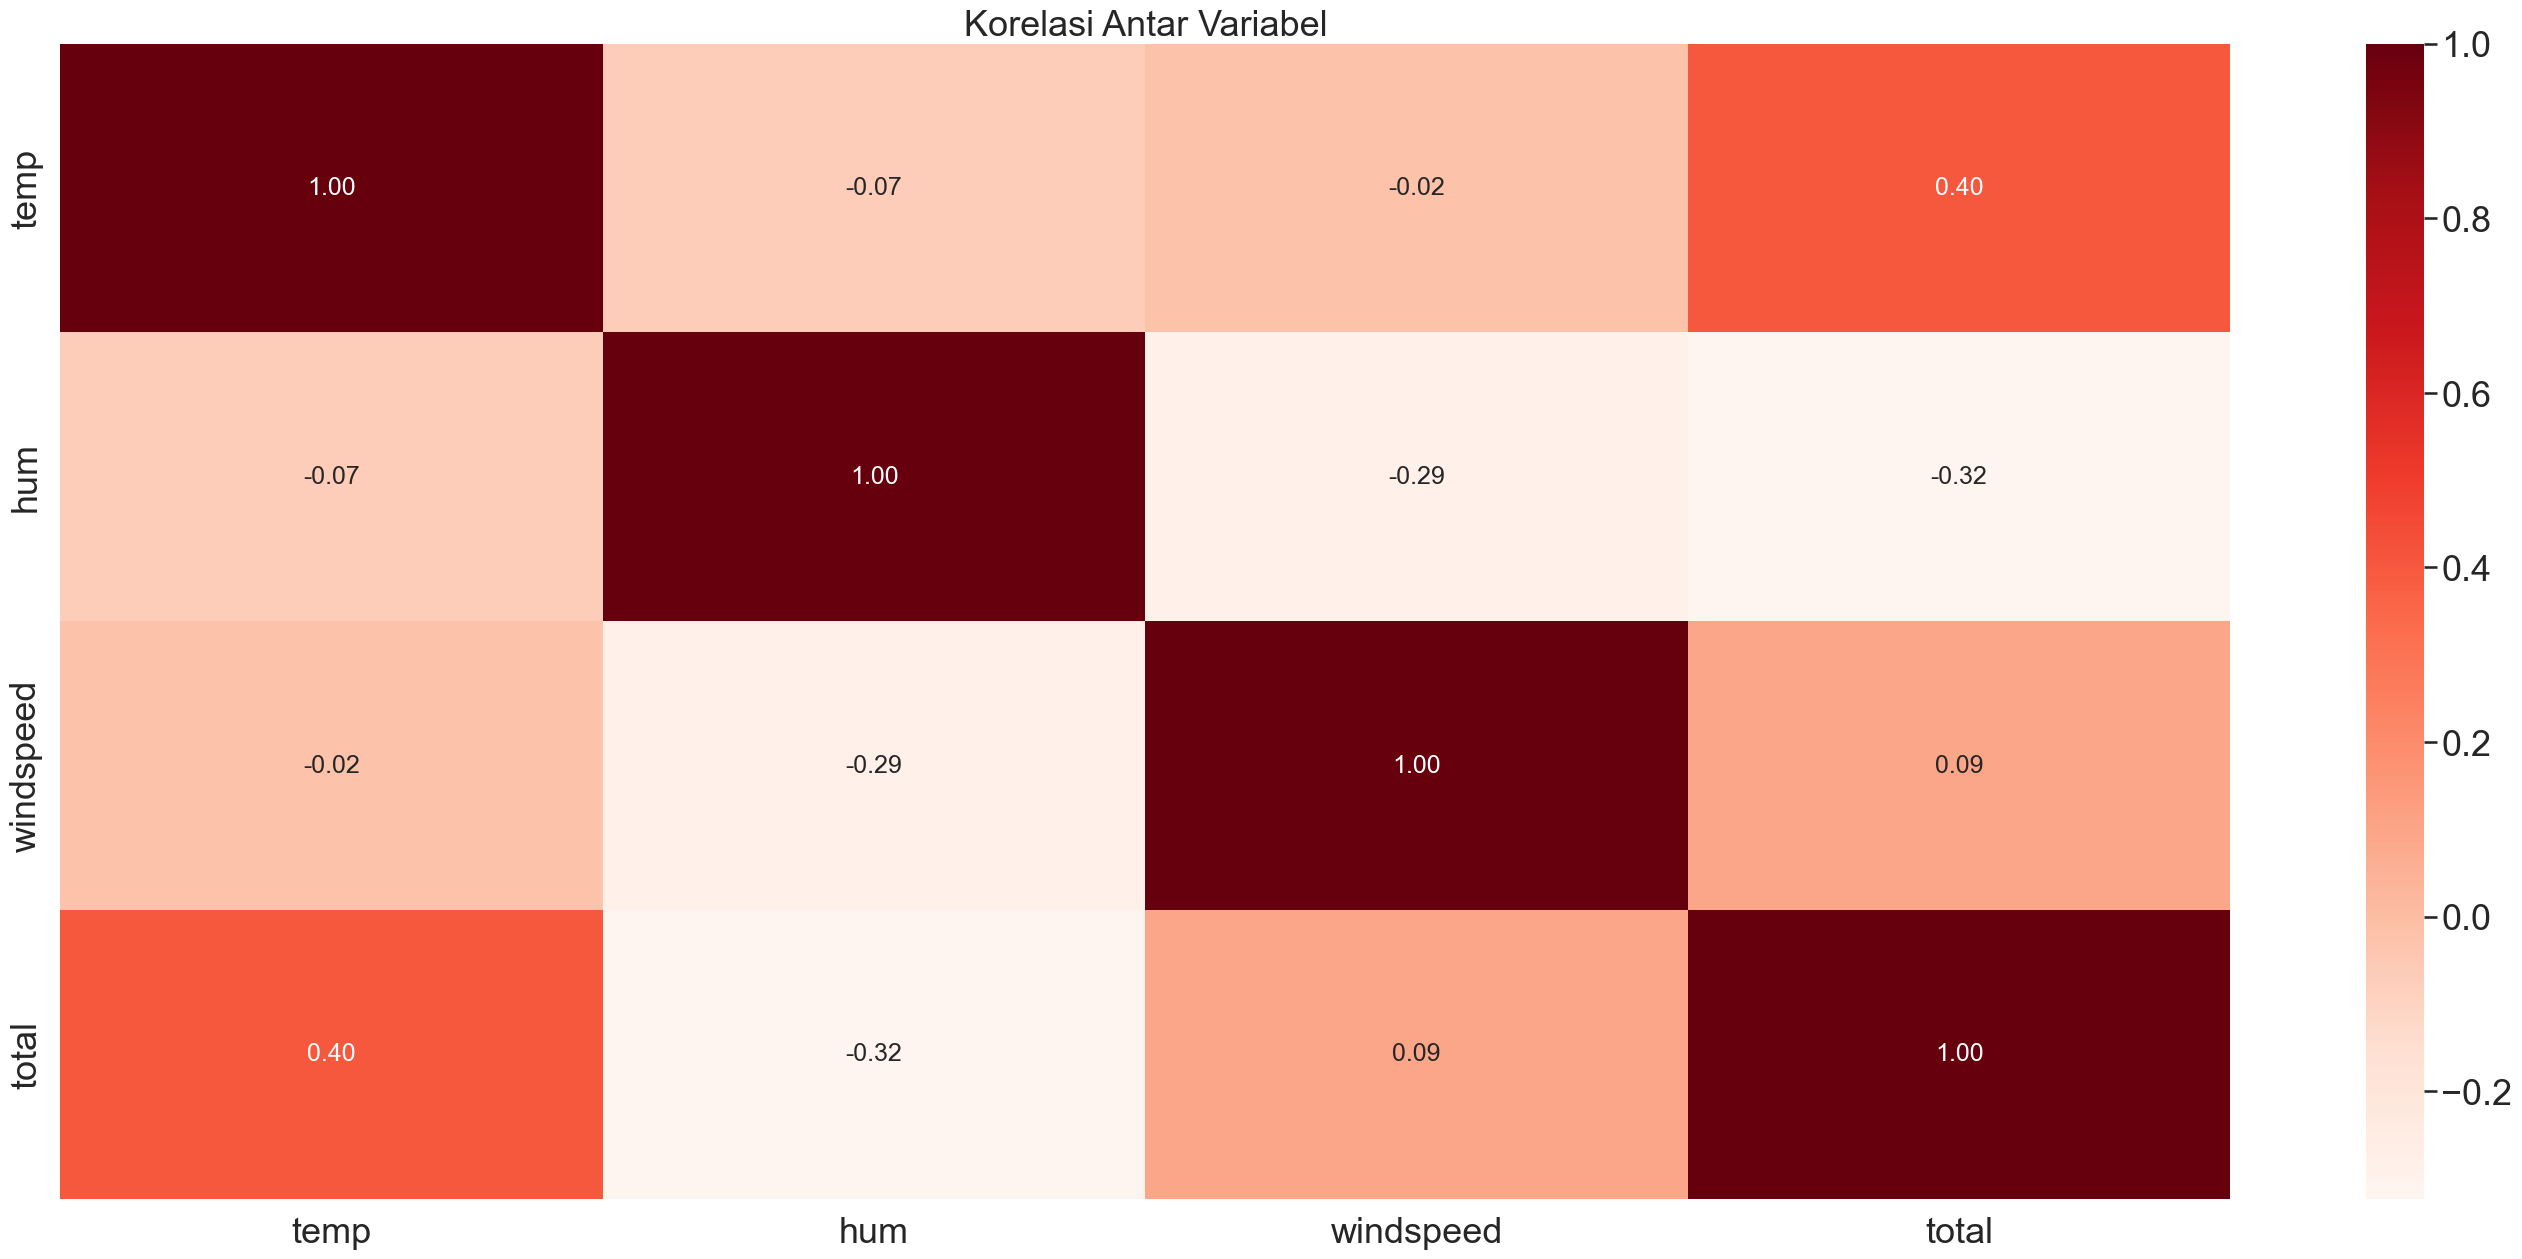

In [30]:
# Hitung matriks korelasi
correlation_matrix = hour_df[['temp',
        'hum',
        'windspeed',
        'total']].corr()
print(correlation_matrix)

# Visualisasikan matriks korelasi sebagai heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

### Pertanyaan 3:

Bagaimana pengaruh kondisi cuaca terhadap tingkat penyewaan sepeda?

/var/folders/dy/x81vxxgj46l7l9n21fbz30xc0000gn/T/ipykernel_10072/2431699111.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df.groupby(by="weather").agg({


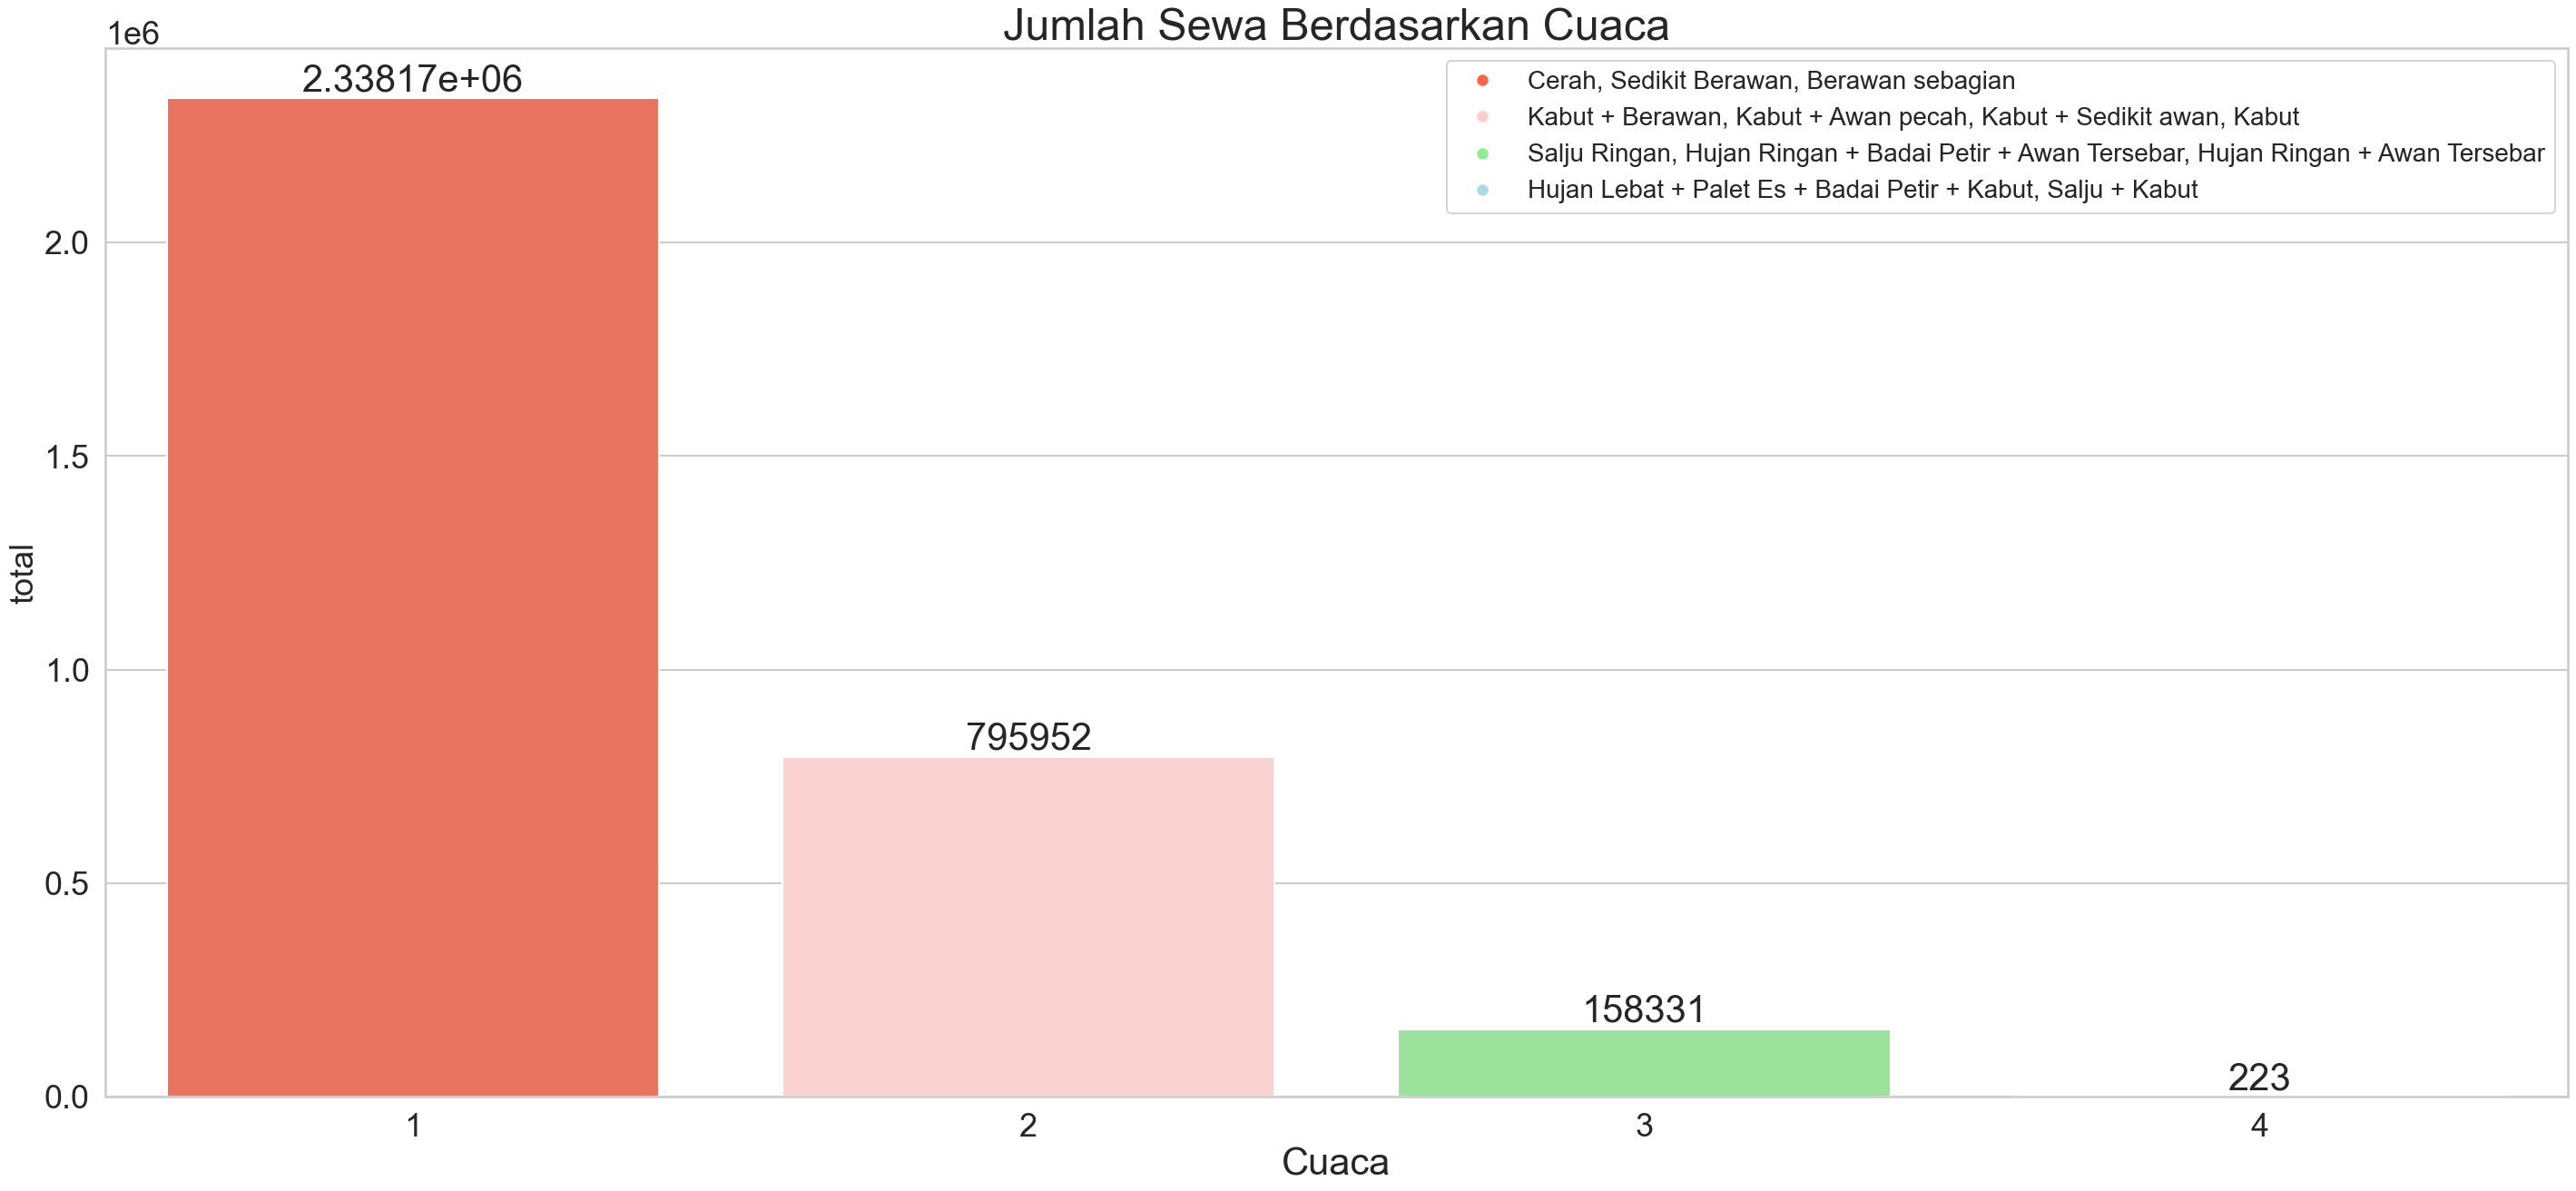

In [31]:
fig, ax = plt.subplots()

colors_a = ["#FF6347", "#FFCCCB", "#90EE90", "#ADD8E6"]

# Plot bar
sns.barplot(data=hour_df.groupby(by="weather").agg({
            "total": "sum"
            }).sort_values(by="total", ascending=False).reset_index(),
            x='weather',
            y='total',
            palette=colors_a,
            ax=ax)

# Set judul dan label sumbu
ax.set_title('Jumlah Sewa Berdasarkan Cuaca', fontsize=35)
ax.set_xlabel('Cuaca', fontsize=30)

# Menambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fontsize=30)

# Menambahkan legend untuk menjelaskan makna dari setiap angka di sumbu x
legend_labels = {
    "1": "Cerah, Sedikit Berawan, Berawan sebagian",
    "2": "Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut",
    "3": "Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar",
    "4": "Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut"
}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for label, color in zip(legend_labels.values(), colors_a)]
ax.legend(handles=legend_elements, labels=legend_labels.values(), loc='upper right', fontsize=20)


## Conclusion

### Kesimpulan 1 :
- ### Terdapat perbedaan yang terjadi antara total sewa pada tahun 2011 dan 2012 yang mana terdapat **kenaikan** pada sebesar __64,87%__ sebesar **2.049.576** total sewa pada tahun **2012**.
- ### Jika dibandingkan antara 2011 dan 2012 sesuai dengan **presentase** sebanyak **37,8%** untuk total sewa tahun **2011** dan **62,2%** untuk tahun **2012**.

### Kesimpulan 2 :
- #### Disitribusi variabel independen(temperatur, kelembapan udara, dan kecepatan angin) dan variabel dependen(total sewa) menunjukkan bahwa **data tidak beristribusi normal** karena H0 dari masing-masing variabel ditolak
- #### Analisis uji korelasi menunjukkan bahwa H0 dari masing-masing variabel independen ditolak yang artinya bahwa **variabel temperatur, kelembapan udara, dan kecepatan angin memilik korelasi terhadap variabel total**.
- #### Korelasi temperatur dan total sewa memiliki nilai 0.42 yang berarti memiliki korelasi positif yang lemah, Korelasi kelembapan udara dan total sewa memiliki nilai -0.36 yang berarti memiliki korelasi negatif yang lemah, Korelasi kecepatan angin dan total sewa memiliki nilai 0.13 yang berarti memiliki korelasi positif yang lemah.
- #### Ketiga variabel memiliki pengaruh terhadap total sewa sepeda namun tidak berpengaruh signifikan

### Kesimpulan 3 :
- ### Dengan Kondisi Cuaca :
    - #### **1(Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan)** memiliki jumlah **penyewaan sepeda terbanyak** dengan total **lebih dari 2.3juta kali sewa**.
    - #### **2(Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut)** memiliki jumlah **penyewaan terbanyak kedua** dengan total **795.952 kali sewa**.
    - #### **3(Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan)** dengan total **158.331 kali sewa**.
    - #### **4(Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut)** memiliki jumlah **paling sedikit** dengan total **223 kali sewa**.
    - #### Jika dijelaskan menurut tahunnya pun dari **keempat cuaca** itu memberikan  **siklus atau pola total penyewaan sepeda yang sama** dan biasanya dengan  **cuaca apapun** jumlah penyewaan sepeda **terbanyak** terjadi di **jam ke-8 dan ke-17**.  
- ### Jadi **kondisi cuaca** sangat **mempengaruhi** tingkat** jumlah sewa sepeda** terutama pada kondisi cuaca yang **ekstrem seperti kondisi 4**.